This script aims at explore the flight radar data taken from OpenSkyNetwork Live API

In [1]:
ls

CHANGELOG.md            credential.txt          flights_over_cergy.csv
README.md               database_explore.ipynb  track_flights.py


In [2]:
import pandas as pd
#pd.DataFrame?

In [3]:
df = pd.read_csv("flights_over_cergy.csv")
print("Total data:", len(df))

Total data: 311


In [4]:
print("Duplicates:", len(df[df.duplicated(subset=['callsign'])]))
df[df.duplicated(subset=['callsign'])]

Duplicates: 157


,timestamp,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,vertical_rate,sensors,geo_altitude,squawk,spi,position_source
2,1613392075,4b0f8f,HBFXF,Switzerland,1613392075,1613392075,2.0273,49.0233,8229.60,False,156.74,144.48,0.00,NaN,8382.00,503.0,False,0
6,1613396490,394a06,AFR006,France,1613396489,1613396489,2.0040,49.0456,3550.92,False,164.61,274.48,6.50,NaN,3688.08,NaN,False,0
8,1613397779,39c423,AFR688,France,1613397779,1613397779,2.0288,49.0375,3307.08,False,146.62,269.40,4.55,NaN,3436.62,NaN,False,0
11,1613399624,48597d,TRA76X,Kingdom of the Netherlands,1613399624,1613399624,2.0824,49.0539,12192.00,False,225.95,27.38,0.00,NaN,12214.86,1000.0,False,0
20,1613478385,406eec,VCG1XP,United Kingdom,1613478384,1613478384,2.0620,49.0184,12496.80,False,199.53,154.82,0.00,NaN,12420.60,502.0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1613832695,39b9cb,FHOOL,France,1613832694,1613832694,2.0750,49.0404,967.74,False,40.21,183.67,-0.33,NaN,975.36,NaN,False,0
305,1613832714,39b9cb,FHOOL,France,1613832714,1613832714,2.0779,49.0336,967.74,False,48.04,133.26,0.33,NaN,975.36,NaN,False,0
307,1613833324,abe1eb,FDX5030,United States,1613833323,1613833324,2.0194,49.0191,1828.80,False,122.65,130.24,-4.55,NaN,1859.28,4134.0,False,0
308,1613833839,398561,AFR18MZ,France,1613833839,1613833839,1.9926,49.0252,1798.32,False,127.07,118.54,-1.95,NaN,1836.42,1000.0,False,0


In [5]:
del df["sensors"]
del df["squawk"]
del df["icao24"]
del df["time_position"]
del df["last_contact"]
del df["longitude"]
del df["latitude"]
del df["on_ground"]
del df["spi"]
del df["position_source"]
df = df.drop_duplicates(subset=['callsign'])

In [6]:
# Remove airplane passing over Cergy higher than 5000 feet
df = df.drop(df[df.geo_altitude > 5000].index)
df

,timestamp,callsign,origin_country,baro_altitude,velocity,heading,vertical_rate,geo_altitude
5,1613396464,AFR006,France,3390.90,149.66,274.53,6.83,3528.06
7,1613397755,AFR688,France,3200.40,134.27,270.00,4.55,3329.94
9,1613397875,ACA871,Canada,3870.96,173.92,274.58,11.70,4008.12
17,1613464335,CTM0032,France,2819.40,116.99,30.96,12.03,2910.84
18,1613470739,VLJ359H,France,830.58,94.32,329.52,-2.93,891.54
...,...,...,...,...,...,...,...,...
294,1613824235,AFR15AD,France,1691.64,134.29,133.29,-4.23,1737.36
297,1613825340,AFR11ZX,France,1554.48,103.69,172.87,0.00,1539.24
299,1613831915,AFR423,France,1562.10,139.15,110.11,0.33,1584.96
306,1613833299,FDX5030,United States,1958.34,110.29,183.48,-5.53,1996.44


In [7]:
df.timestamp = pd.to_datetime(df.timestamp, unit='s').dt.normalize()
df["day"] = df.timestamp.dt.day
df["month"] = df.timestamp.dt.month
df["year"] = df.timestamp.dt.year
df

,timestamp,callsign,origin_country,baro_altitude,velocity,heading,vertical_rate,geo_altitude,day,month,year
5,2021-02-15,AFR006,France,3390.90,149.66,274.53,6.83,3528.06,15,2,2021
7,2021-02-15,AFR688,France,3200.40,134.27,270.00,4.55,3329.94,15,2,2021
9,2021-02-15,ACA871,Canada,3870.96,173.92,274.58,11.70,4008.12,15,2,2021
17,2021-02-16,CTM0032,France,2819.40,116.99,30.96,12.03,2910.84,16,2,2021
18,2021-02-16,VLJ359H,France,830.58,94.32,329.52,-2.93,891.54,16,2,2021
...,...,...,...,...,...,...,...,...,...,...,...
294,2021-02-20,AFR15AD,France,1691.64,134.29,133.29,-4.23,1737.36,20,2,2021
297,2021-02-20,AFR11ZX,France,1554.48,103.69,172.87,0.00,1539.24,20,2,2021
299,2021-02-20,AFR423,France,1562.10,139.15,110.11,0.33,1584.96,20,2,2021
306,2021-02-20,FDX5030,United States,1958.34,110.29,183.48,-5.53,1996.44,20,2,2021


In [11]:
df2 = df[["day"]]
df2["numberplane"] = 0
df3 = df2.groupby(by=["day"]).count()
df3

<ipython-input-11-b53559577a9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["numberplane"] = 0


,numberplane
day,
15,3
16,2
17,17
18,32
19,34
20,22


Let's plot the number of airplane passing over Cergy every day

<AxesSubplot:xlabel='day'>

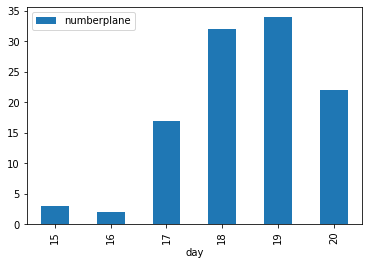

In [18]:
df3.plot.bar(y="numberplane", use_index=True)